# Himawari-8 Satellite/GV Flight Track Matching

Cloud retrival datasets from the Himawari-8 satellite were available every 10 minutes at approximately 2 km horizontal resolution.  Retrival algorithms created by the NASA SatCorps group to retrieve cloud top altitude, cloud top temperature, cloud phase, shortwave albedo, broadband longwave flux, and more were used to create the Himawari-8 satellite dataset.  The cloud top altitude and cloud top temperature Himawari-8 products were used to obtain the nearest neighbor pixel every 10 s along the GV flight track by determining the value of the nearest neighbor pixel to the GV flight track within 5 minutes of the aircraft's position.  This code outfiles the nearest neighbor values as a CSV to the Desktop and requires Himawari-8 satellite and flight level data.  

In [1]:
import numpy as np
import xarray as xr
import pandas as pd

from datetime import datetime
from datetime import timedelta  


import cartopy.crs as ccrs
import cartopy.geodesic

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, MultipleLocator

import glob

import warnings 
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore",category=RuntimeWarning)

%matplotlib inline

In [2]:
def get_coords(time, fltLat, fltLon, plotTimes):
    plotLats = np.zeros(len(plotTimes)); plotLons = np.zeros(len(plotTimes));
    for times in range(len(plotTimes)):
        ind = np.where(time==plotTimes[times])[0][0]
        plotLats[times] = fltLat[ind]; plotLons[times] = fltLon[ind];
        
    return (plotLats, plotLons)




rf = 'RF02'

In [3]:
if rf == 'RF01': 
    start_sat_time = '2018-01-15 23:00:00'
    end_sat_time = '2018-01-16 06:30:00'

    trange = pd.date_range(start_sat_time, end_sat_time, freq = '10T')
    
if rf == 'RF02':
    start_sat_time = '2018-01-19 01:00:00'
    end_sat_time = '2018-01-19 08:00:00'
    
    trange = pd.date_range(start_sat_time, end_sat_time, freq = '10T')

if rf == 'RF03':
    start_sat_time = '2018-01-22 21:10:00'
    end_sat_time = '2018-01-23 04:10:00'

    trange = pd.date_range(start_sat_time, end_sat_time, freq = '10T')

if rf == 'RF04':
    start_sat_time = '2018-01-23 23:20:00'
    end_sat_time = '2018-01-24 06:10:00'

    trange = pd.date_range(start_sat_time, end_sat_time, freq = '10T')

if rf == 'RF05':
    start_sat_time = '2018-01-25 23:00:00'
    end_sat_time = '2018-01-26 05:50:00'

    trange = pd.date_range(start_sat_time, end_sat_time, freq = '10T')
    
if rf == 'RF06':
    start_sat_time = '2018-01-28 23:00:00'
    end_sat_time = '2018-01-29 06:10:00'

    trange = pd.date_range(start_sat_time, end_sat_time, freq = '10T')
     
if rf == 'RF07':
    start_sat_time = '2018-01-31 23:00:00'
    end_sat_time = '2018-01-31 06:30:00'

    trange = pd.date_range(start_sat_time, end_sat_time, freq = '10T')
    
if rf == 'RF08':
    start_sat_time = '2018-02-03 00:30:00'
    end_sat_time = '2018-02-04 08:30:00'

    trange = pd.date_range(start_sat_time, end_sat_time, freq = '10T')
    
if rf == 'RF09':
    start_sat_time = '2018-02-04 22:30:00'
    end_sat_time = '2018-02-05 07:30:00'

    trange = pd.date_range(start_sat_time, end_sat_time, freq = '10T')
    
if rf == 'RF10':
    start_sat_time = '2018-02-07 21:10:00'
    end_sat_time = '2018-02-07 05:30:00'

    trange = pd.date_range(start_sat_time, end_sat_time, freq = '10T')
    
if rf == 'RF11':
    start_sat_time = '2018-02-17 01:40:00'
    end_sat_time = '2018-02-17 06:20:00'

    trange = pd.date_range(start_sat_time, end_sat_time, freq = '10T')
    
if rf == 'RF12':
    start_sat_time = '2018-02-18 00:00:00'
    end_sat_time = '2018-02-18 08:00:00'

    trange = pd.date_range(start_sat_time, end_sat_time, freq = '10T')
    
if rf == 'RF13':
    start_sat_time = '2018-02-19 23:00:00'
    end_sat_time = '2018-02-20 07:00:00'

    trange = pd.date_range(start_sat_time, end_sat_time, freq = '10T')
    
if rf == 'RF14':
    start_sat_time = '2018-02-21 23:10:00'
    end_sat_time = '2018-02-22 07:00:00'

    trange = pd.date_range(start_sat_time, end_sat_time, freq = '10T')
    
if rf == 'RF15':
    start_sat_time = '2018-02-24 02:00:00'
    end_sat_time = '2018-02-24 09:00:00'

    trange = pd.date_range(start_sat_time, end_sat_time, freq = '10T')

In [4]:
trange

DatetimeIndex(['2018-01-19 01:00:00', '2018-01-19 01:10:00',
               '2018-01-19 01:20:00', '2018-01-19 01:30:00',
               '2018-01-19 01:40:00', '2018-01-19 01:50:00',
               '2018-01-19 02:00:00', '2018-01-19 02:10:00',
               '2018-01-19 02:20:00', '2018-01-19 02:30:00',
               '2018-01-19 02:40:00', '2018-01-19 02:50:00',
               '2018-01-19 03:00:00', '2018-01-19 03:10:00',
               '2018-01-19 03:20:00', '2018-01-19 03:30:00',
               '2018-01-19 03:40:00', '2018-01-19 03:50:00',
               '2018-01-19 04:00:00', '2018-01-19 04:10:00',
               '2018-01-19 04:20:00', '2018-01-19 04:30:00',
               '2018-01-19 04:40:00', '2018-01-19 04:50:00',
               '2018-01-19 05:00:00', '2018-01-19 05:10:00',
               '2018-01-19 05:20:00', '2018-01-19 05:30:00',
               '2018-01-19 05:40:00', '2018-01-19 05:50:00',
               '2018-01-19 06:00:00', '2018-01-19 06:10:00',
               '2018-01-

In [11]:
df_cloud_top_temperature = pd.DataFrame()
df_cloud_phase = pd.DataFrame()
df_cloud_top_height = pd.DataFrame()
df_shortwave_albedo = pd.DataFrame()
df_broadband_longwave_flux = pd.DataFrame()
df_lwp_iwp = pd.DataFrame()
df_cloud_particle_size = pd.DataFrame()
t = pd.DataFrame() 



for i in range(len(trange)):
    try: 

        if i < trange.shape[0] - 1:

            startT = np.datetime64(trange[i]) - np.timedelta64(5, 'm')
            endT = np.datetime64(trange[i+1]) - np.timedelta64(5, 'm')


            satellite_files = glob.glob('/Volumes/Hard Drive/2018 - SOCRATES/Data/HIMAWARI Data/' + rf + '/*')
            satellite_files.sort()

            open_sat_file = xr.open_dataset(satellite_files[i])
            lats = open_sat_file['latitude'].values
            lons = open_sat_file['longitude'].values
            temp_cloud_top = open_sat_file['cloud_top_temperature'].values
            height_cloud_top = open_sat_file['cloud_top_height'].values
            cloud_phase = open_sat_file['cloud_phase'].values
            shortwave_albedo = open_sat_file['broadband_shortwave_albedo'].values
            broadband_longwave_flux = open_sat_file['broadband_longwave_flux'].values
            lwp_iwp = open_sat_file['cloud_lwp_iwp'].values
            cloud_particle_size = open_sat_file['cloud_particle_size'].values


            fld_data_file = '/Volumes/Hard Drive/2018 - SOCRATES/Data/Flight Level Data/' + rf + '.nc'
            open_fld_file = xr.open_dataset(fld_data_file)

            time = open_fld_file['Time'].values
            fld_lat = open_fld_file['GGLAT'].values
            fld_lon = open_fld_file['GGLON'].values

            time_indicies = np.where((time > startT) & (time < endT))[0]


            geod = cartopy.geodesic.Geodesic()

            numIterations = int(np.timedelta64(endT - startT, 's').astype(int) / 10)
            dtArray = np.array([startT + np.timedelta64(10*i, 's') for i in range(numIterations+1)])
            [trackLats, trackLons] = get_coords(time, fld_lat, fld_lon, dtArray)
            trackCoords = np.array([trackLons, trackLats]).T

            dataCoords = np.array([lons.flatten(), lats.flatten()]).T
            hght_flattened = height_cloud_top.flatten()
            temp_flattened = temp_cloud_top.flatten()
            cloud_phase_flattened = cloud_phase.flatten()
            shortwave_albedo_flattened = shortwave_albedo.flatten()
            broadband_longwave_flux_flattened = broadband_longwave_flux.flatten()
            lwp_iwp_flattened = lwp_iwp.flatten()
            cloud_particle_size_flattened = cloud_particle_size.flatten()

            def _nanargmin(arr):
                try:
                    return np.nanargmin(arr)
                except ValueError:
                    return 0

            trackHght = np.empty(numIterations+1)*np.nan
            trackTemp = np.empty(numIterations+1)*np.nan
            trackCPhase = np.empty(numIterations+1)*np.nan
            trackSWAlbe = np.empty(numIterations+1)*np.nan
            trackLFFlat = np.empty(numIterations+1)*np.nan
            trackLWPIWP = np.empty(numIterations+1)*np.nan
            trackCloPar = np.empty(numIterations+1)*np.nan


            for times in range(numIterations+1):
                outputVars = geod.inverse(trackCoords[times, :], dataCoords)
                distances = outputVars[:, 0]
                trackHght[times] = hght_flattened[_nanargmin(distances)]
                trackTemp[times] = temp_flattened[_nanargmin(distances)]
                trackCPhase[times] = cloud_phase_flattened[_nanargmin(distances)]
                trackSWAlbe[times] = shortwave_albedo_flattened[_nanargmin(distances)]
                trackLFFlat[times] = broadband_longwave_flux_flattened[_nanargmin(distances)]
                trackLWPIWP[times] = lwp_iwp_flattened[_nanargmin(distances)]
                trackCloPar[times] = cloud_particle_size_flattened[_nanargmin(distances)]


            track_hgt = pd.DataFrame(trackHght)
            track_temp = pd.DataFrame(trackTemp)
            track_c_phase = pd.DataFrame(trackCPhase)
            track_swalbed = pd.DataFrame(trackSWAlbe)
            track_loflufl = pd.DataFrame(trackLFFlat)
            track_lwp_iwp = pd.DataFrame(trackLWPIWP)
            track_clo_par = pd.DataFrame(trackCloPar)

            df_cloud_top_height = pd.concat([df_cloud_top_height, track_hgt])
            df_cloud_top_temperature = pd.concat([df_cloud_top_temperature, track_temp - 273.15])
            df_cloud_phase = pd.concat([df_cloud_phase, track_c_phase])
            df_shortwave_albedo = pd.concat([df_shortwave_albedo, track_swalbed])
            df_broadband_longwave_flux = pd.concat([df_broadband_longwave_flux, track_loflufl])
            df_lwp_iwp = pd.concat([df_lwp_iwp, track_lwp_iwp])
            df_cloud_particle_size = pd.concat([df_cloud_particle_size, track_clo_par])

            time_df = pd.DataFrame(dtArray)
            t = pd.concat([t, time_df])

            #print(df_cloud_top_height)
            #print(df_cloud_top_temperature)
        
    except: 
        break

/Users/troyzaremba/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


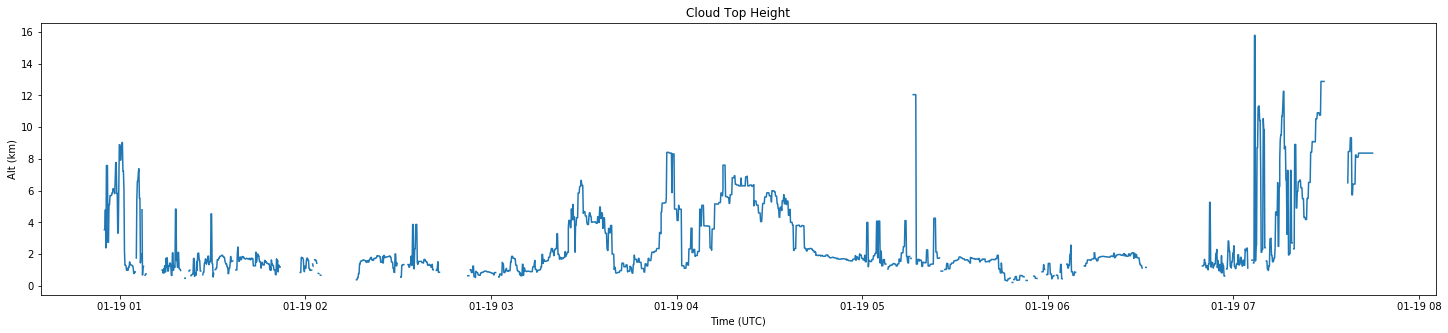

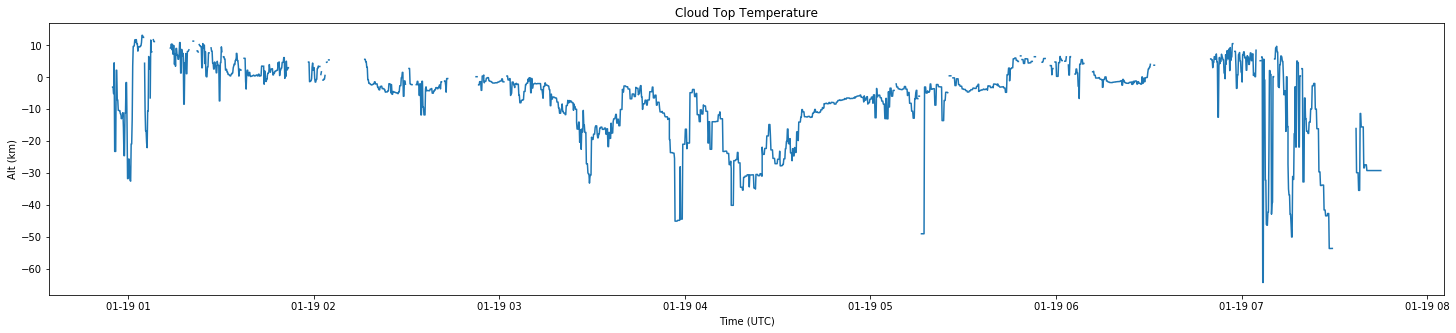

In [6]:
plt.subplots(figsize = (25, 5))
plt.plot(t, df_cloud_top_height)
plt.title('Cloud Top Height')
plt.ylabel('Alt (km)')
plt.xlabel('Time (UTC)')
plt.show()


plt.subplots(figsize = (25, 5))
plt.plot(t, df_cloud_top_temperature)
plt.title('Cloud Top Temperature')
plt.ylabel('Alt (km)')
plt.xlabel('Time (UTC)')
plt.show()

In [7]:
cth = []
ctt = []
cp = []
sa = []
lwf = []
iwp_lwp = []
cps = []
time = []

for i in range(df_cloud_top_height.values.shape[0]):
    cth.append(df_cloud_top_height.values[i][0])
    ctt.append(df_cloud_top_temperature.values[i][0])
    cp.append(df_cloud_phase.values[i][0])
    sa.append(df_shortwave_albedo.values[i][0])
    lwf.append(df_broadband_longwave_flux.values[i][0])
    iwp_lwp.append(df_lwp_iwp.values[i][0])
    cps.append(df_cloud_particle_size.values[i][0])
    time.append(t.values[i][0])
    
new_df = pd.DataFrame()
new_df['Cloud Top Height'] = cth
new_df['Cloud Top Temperature'] = ctt
new_df['Cloud Top Phase'] = cp
new_df['Shortwave Albedo'] = sa
new_df['Long Wave Flux'] = lwf
new_df['Ice Water Path'] = iwp_lwp
new_df['Cloud Particle Size'] = cps

new_df['RF'] = rf
new_df.index = time

new_df.to_csv('Desktop/' + rf + '_satellite_flight_track_match.csv')